In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Load the preprocessed data
X_preprocessed = pd.read_csv('data/preprocessed_vgchartz_features.csv')

# Load the original data to keep track of other columns
original_data = pd.read_csv('data/vgchartz-2024.csv')

# Ensure the original data and preprocessed data have the same index alignment
original_data = original_data.drop(columns=['img']).dropna(subset=['total_sales', 'genre', 'publisher', 'critic_score'])
original_data['release_date'] = pd.to_datetime(original_data['release_date'], errors='coerce')
sales_columns = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
original_data[sales_columns] = original_data[sales_columns].fillna(0)
original_data = original_data.dropna()

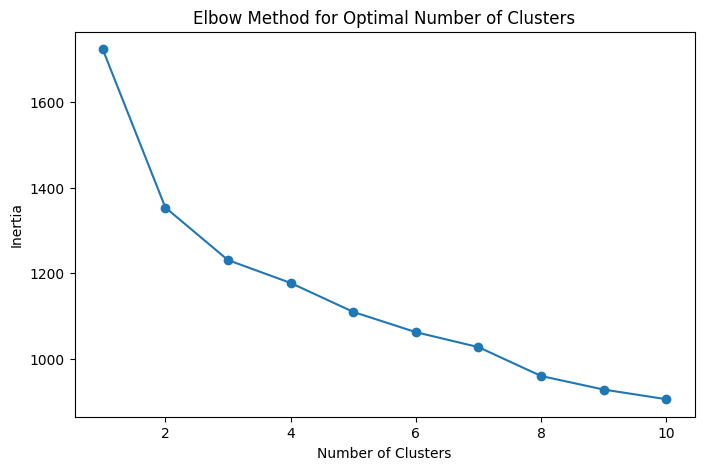

In [6]:
# Use the elbow method to find the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [7]:
# Based on the elbow method, let's choose an optimal number of clusters, e.g., 5
optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
original_data['cluster'] = kmeans.fit_predict(X_preprocessed)

# Save the clustered data
original_data.to_csv('clustered_vgchartz_2024.csv', index=False)


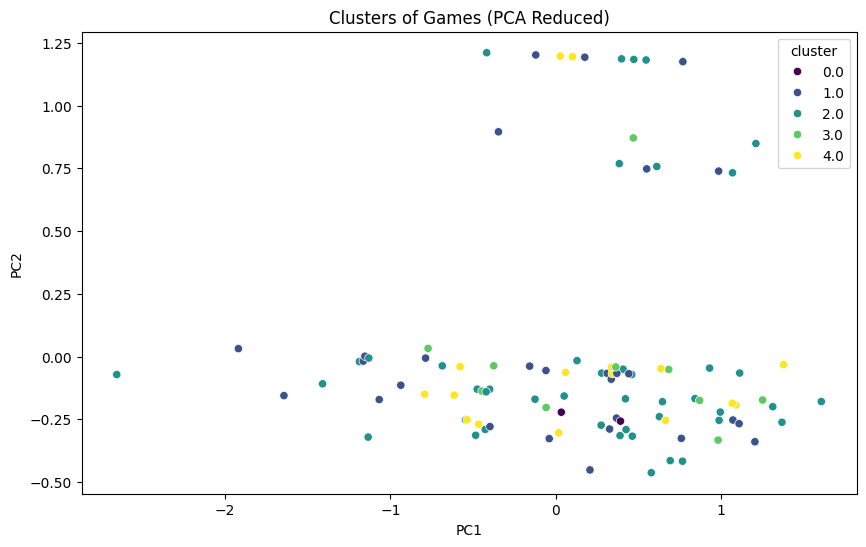

In [8]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = original_data['cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Clusters of Games (PCA Reduced)')
plt.show()
